In [1]:
#Comment
#Observation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("C:\\Users\\Admin\\PycharmProjects\\EDA&FeatureEngg\\Dataset\\data1\\Travel.csv")

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [7]:
cat_col = [fea for fea in data.columns if data[fea].dtype=='O']  # This gives a list of categorical columns

In [8]:
cat_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [9]:
num_col = [fea for fea in data.columns if data[fea].dtype!='O']  # This gives a list of categorical columns

In [10]:
num_col

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [11]:
data[cat_col]

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive
...,...,...,...,...,...,...
4883,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager
4884,Company Invited,Salaried,Male,Basic,Single,Executive
4885,Self Enquiry,Salaried,Female,Standard,Married,Senior Manager
4886,Self Enquiry,Small Business,Male,Basic,Single,Executive


In [12]:
data[num_col]

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,200004,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,204884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,204885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,204886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [13]:
data.memory_usage()

Index                         128
CustomerID                  39104
ProdTaken                   39104
Age                         39104
TypeofContact               39104
CityTier                    39104
DurationOfPitch             39104
Occupation                  39104
Gender                      39104
NumberOfPersonVisiting      39104
NumberOfFollowups           39104
ProductPitched              39104
PreferredPropertyStar       39104
MaritalStatus               39104
NumberOfTrips               39104
Passport                    39104
PitchSatisfactionScore      39104
OwnCar                      39104
NumberOfChildrenVisiting    39104
Designation                 39104
MonthlyIncome               39104
dtype: int64

In [14]:
data.isna().sum().sum()  # There are total 1012 null values in this dataframe

1012

In [15]:
data.isna().sum()  # 8 columns have null values

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [16]:
# fill na values with the mean
data.fillna(data.mean(),inplace=True)

In [17]:
data.isna().sum().sum() 

25

In [18]:
data.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [19]:
# TypeofContact column still has na values.

In [20]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [21]:
# Fill the NA values of the column Typeofcontract with value 'Unknown'

In [22]:
# Function to input null value with new category 'Unknown'
def input_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])

In [23]:
# Call function to create new category for columns
for Columns in ['TypeofContact']:
    input_nan_create_category(data,Columns)

In [24]:
data.isna().sum() # Now check if any column has na values

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [25]:
data.duplicated().sum()  # There are no duplicate rows

0

# statistical analysis

In [26]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.098418,0.916583,8.297971,0.724891,0.997882,0.795883,1.822342,0.454232,1.365792,0.485363,0.852049,5250.862747
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20485.000000
50%,202443.500000,0.000000,37.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22655.000000
75%,203665.250000,0.000000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25424.750000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.622265,9.098418,18.0,31.00,37.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.490835,8.297971,5.0,9.00,14.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.708445,0.997882,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.581037,0.795883,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.236521,1.822342,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [28]:
data.corr()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.031362,0.012975,0.062645,0.604013,0.425555,0.010517,0.221261,0.007974,-0.035847,0.003805,0.508744,0.270023
ProdTaken,0.056506,1.000000,-0.143717,0.086852,0.076297,0.009627,0.111675,0.099265,0.018739,0.260844,0.051394,-0.011508,0.007388,-0.128092
Age,0.031362,-0.143717,1.000000,-0.015344,-0.011280,0.011298,-0.002477,-0.010130,0.175526,0.032602,0.018055,0.047525,0.006617,0.456273
CityTier,0.012975,0.086852,-0.015344,1.000000,0.022020,-0.001671,0.023524,-0.009145,-0.029352,0.001793,-0.042160,0.003817,0.000668,0.050644
DurationOfPitch,0.062645,0.076297,-0.011280,0.022020,1.000000,0.063310,0.009197,-0.006448,0.009470,0.032245,-0.002810,-0.001585,0.030349,-0.006004
NumberOfPersonVisiting,0.604013,0.009627,0.011298,-0.001671,0.063310,1.000000,0.326649,0.033749,0.192513,0.011177,-0.019581,0.010362,0.607215,0.189278
NumberOfFollowups,0.425555,0.111675,-0.002477,0.023524,0.009197,0.326649,1.000000,-0.023957,0.137420,0.004951,0.004035,0.012057,0.283545,0.172591
PreferredPropertyStar,0.010517,0.099265,-0.010130,-0.009145,-0.006448,0.033749,-0.023957,1.000000,0.011880,0.001038,-0.022635,0.015712,0.035378,0.013432
NumberOfTrips,0.221261,0.018739,0.175526,-0.029352,0.009470,0.192513,0.137420,0.011880,1.000000,0.012769,-0.004307,-0.011666,0.164996,0.120758
Passport,0.007974,0.260844,0.032602,0.001793,0.032245,0.011177,0.004951,0.001038,0.012769,1.000000,0.002926,-0.022330,0.020132,0.002488


In [29]:
data.cov()  # covariance

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.991453e+06,31.172498,402.680790,16.782689,733.567633,617.879272,599.266745,11.812568,569.010915,5.111316,-69.092081,2.606098,611.714536,2.000861e+06
ProdTaken,3.117250e+01,0.152822,-0.511173,0.031120,0.247497,0.002728,0.043564,0.030884,0.013350,0.046318,0.027440,-0.002184,0.002461,-2.629341e+02
Age,4.026808e+02,-0.511173,82.781217,-0.127963,-0.851601,0.074513,-0.022487,-0.073354,2.910303,0.134736,0.224356,0.209874,0.051300,2.179824e+04
CityTier,1.678269e+01,0.031120,-0.127963,0.840125,0.167477,-0.001110,0.021516,-0.006671,-0.049028,0.000747,-0.052778,0.001698,0.000521,2.437431e+02
DurationOfPitch,7.335676e+02,0.247497,-0.851601,0.167477,68.856325,0.380816,0.076157,-0.042581,0.143205,0.121538,-0.031845,-0.006385,0.214578,-2.616117e+02
NumberOfPersonVisiting,6.178793e+02,0.002728,0.074513,-0.001110,0.380816,0.525466,0.236283,0.019471,0.254309,0.003680,-0.019386,0.003646,0.375042,7.204499e+02
NumberOfFollowups,5.992667e+02,0.043564,-0.022487,0.021516,0.076157,0.236283,0.995769,-0.019026,0.249896,0.002244,0.005499,0.005840,0.241082,9.043315e+02
PreferredPropertyStar,1.181257e+01,0.030884,-0.073354,-0.006671,-0.042581,0.019471,-0.019026,0.633430,0.017230,0.000375,-0.024604,0.006069,0.023991,5.613408e+01
NumberOfTrips,5.690109e+02,0.013350,2.910303,-0.049028,0.143205,0.254309,0.249896,0.017230,3.320930,0.010570,-0.010719,-0.010318,0.256193,1.155514e+03
Passport,5.111316e+00,0.046318,0.134736,0.000747,0.121538,0.003680,0.002244,0.000375,0.010570,0.206326,0.001815,-0.004923,0.007792,5.932995e+00


In [30]:
data.skew()  # skewness of data

CustomerID                  0.000000
ProdTaken                   1.595763
Age                         0.392156
CityTier                    0.736531
DurationOfPitch             1.798801
NumberOfPersonVisiting      0.029817
NumberOfFollowups          -0.374446
PreferredPropertyStar       0.897935
NumberOfTrips               1.475149
Passport                    0.920980
PitchSatisfactionScore     -0.127726
OwnCar                     -0.495892
NumberOfChildrenVisiting    0.274055
MonthlyIncome               1.997315
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

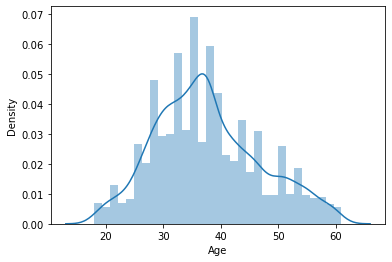

In [31]:
sns.distplot(data['Age'])  #distribution plot

In [32]:
data.groupby('CityTier').mean()

,CustomerID,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CityTier,,,,,,,,,,,,,
1,202428.519122,0.163009,37.688717,15.371989,2.908777,3.693601,3.583529,3.280381,0.290909,3.122257,0.618182,1.185479,23428.535682
2,202511.989899,0.232323,38.639396,15.186684,2.813131,3.655726,3.665369,3.033342,0.272727,2.959596,0.646465,1.232002,23768.515762
3,202466.318667,0.236000,37.346683,15.783728,2.909333,3.746974,3.564603,3.170064,0.293333,3.000000,0.621333,1.185164,24007.099278


In [33]:
data.groupby('CityTier').count()

,CustomerID,ProdTaken,Age,TypeofContact,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
CityTier,,,,,,,,,,,,,,,,,,,
1,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190
2,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
3,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500


In [34]:
# The observation is that tier 1 city has more travelers
# Tier 3 cities has second largest travelers after tier 1 cities
# tier 2 cities have very less travelers

In [35]:
data.groupby('TypeofContact').count()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
TypeofContact,,,,,,,,,,,,,,,,,,,
Company Invited,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419
Self Enquiry,3444,3444,3444,3444,3444,3444,3444,3444,3444,3444,3444,3444,3444,3444,3444,3444,3444,3444,3444
Unknown,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25


In [36]:
# Most travelers visited by self enquiry, followed by company invited

In [37]:
data.groupby('Gender').count()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
Gender,,,,,,,,,,,,,,,,,,,
Fe Male,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155
Female,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817
Male,2916,2916,2916,2916,2916,2916,2916,2916,2916,2916,2916,2916,2916,2916,2916,2916,2916,2916,2916


In [38]:
# the data shows that Males travel more than female

In [39]:
# there are 4888 rows of data

In [40]:
data.count()

CustomerID                  4888
ProdTaken                   4888
Age                         4888
TypeofContact               4888
CityTier                    4888
DurationOfPitch             4888
Occupation                  4888
Gender                      4888
NumberOfPersonVisiting      4888
NumberOfFollowups           4888
ProductPitched              4888
PreferredPropertyStar       4888
MaritalStatus               4888
NumberOfTrips               4888
Passport                    4888
PitchSatisfactionScore      4888
OwnCar                      4888
NumberOfChildrenVisiting    4888
Designation                 4888
MonthlyIncome               4888
dtype: int64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

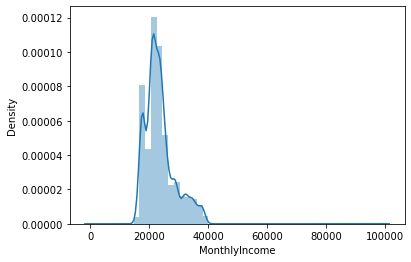

In [41]:
sns.distplot(data['MonthlyIncome'])  #distribution plot

In [42]:
# Most number of travelers have monthly income bracket 20000 to 40000

In [43]:
data[data['MonthlyIncome']>40000]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.581037,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2482,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.000000,Divorced,2.0,1,2,1,1.0,Executive,98678.0


In [44]:
# There are only 2 travelers whose monthly income is more than 40000

In [45]:
data_num = data[num_col]

In [46]:
data_num.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,200004,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0


In [47]:
from scipy.stats import normaltest

In [48]:
normaltest(data_num['Age'])[1]

6.03619263426989e-33

In [49]:
# above non normally distributed. since, p > 0.05 

In [50]:
# now let us detect and remove outlier

<AxesSubplot:>

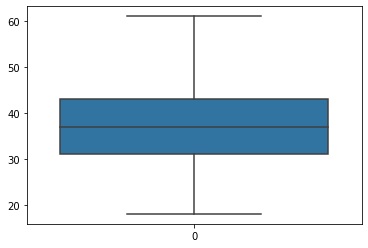

In [51]:
sns.boxplot(data=data['Age'])   # There are no outliers in the column 'Age'

<AxesSubplot:>

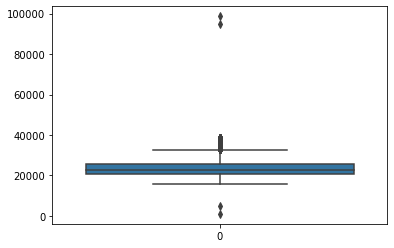

In [52]:
sns.boxplot(data=data['MonthlyIncome'])   # Monthly income column has outliers

<AxesSubplot:>

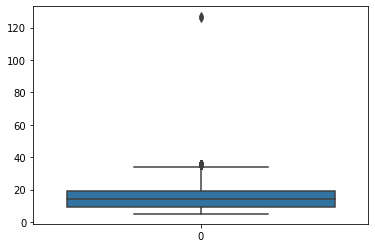

In [53]:
sns.boxplot(data=data['DurationOfPitch']) # 'DurationOfPitch' column has outliers

<AxesSubplot:>

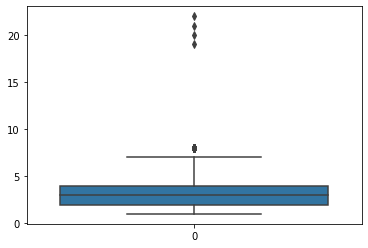

In [54]:
sns.boxplot(data=data['NumberOfTrips'])  # 'NumberOfTrips' column has outliers

In [55]:
data_num['MonthlyIncome'].min()

1000.0

In [56]:
data_num['MonthlyIncome'].max()

98678.0

In [57]:
data['DurationOfPitch'].min()

5.0

In [58]:
data['DurationOfPitch'].max()

127.0

In [59]:
data['NumberOfTrips'].min()

1.0

In [60]:
data['NumberOfTrips'].max()

22.0

In [61]:
# Now, let us create a function to remove outliers

In [62]:
data.shape  # size of data before outliers are removed

(4888, 20)

In [63]:
def get_iqr(df, column_name, q1_range, q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5 * IQR
    lower_fence = q1 - 1.5 * IQR
    return IQR, upper_fence, lower_fence

In [64]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q2=df[variable].quantile(0.75)
    iqr=q2-q1
    up_limit=q2+(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit

In [65]:
def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        low_limit,upper_limit=outlier_threshold(data_num,variable)
        data.loc[data[variable]<low_limit,variable]=low_limit
        data.loc[data[variable]>upper_limit,variable]=upper_limit

In [66]:
replace_with_threshold(data,data_num.columns)    

In [67]:
# Now check if the outliers are removed, by running the same code again

<AxesSubplot:>

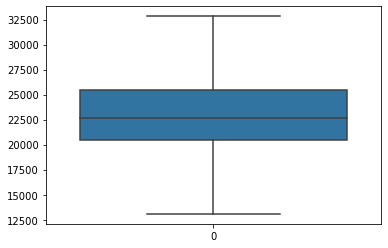

In [68]:
sns.boxplot(data=data['MonthlyIncome'])   # Monthly income column has outliers

<AxesSubplot:>

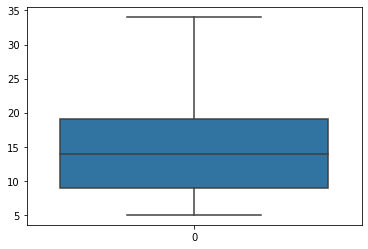

In [69]:
sns.boxplot(data=data['DurationOfPitch']) # 'DurationOfPitch' column has outliers

<AxesSubplot:>

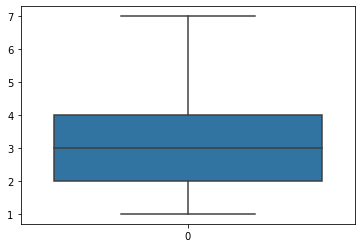

In [70]:
sns.boxplot(data=data['NumberOfTrips'])  # 'NumberOfTrips' column has outliers

In [71]:
# outliers are removed

# graph analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

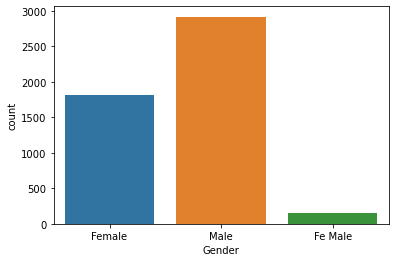

In [72]:
sns.countplot(data['Gender'])

In [73]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<AxesSubplot:xlabel='TypeofContact', ylabel='count'>

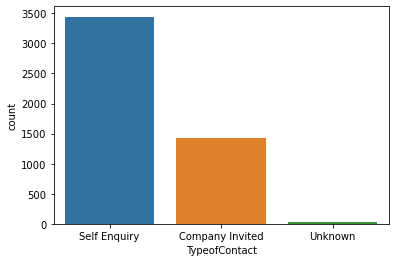

In [74]:
sns.countplot(data['TypeofContact'])

In [75]:
df1=data.groupby('Gender').mean()

In [76]:
df1

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
Gender,,,,,,,,,,,,,,
Fe Male,202923.277419,0.0,38.406452,1.954839,15.096774,3.029032,3.916129,3.490323,3.677419,0.277419,2.967742,0.696774,1.296774,25579.116129
Female,202403.787562,0.0,38.016525,1.654926,15.397904,2.902312,3.701455,3.613634,3.182943,0.314254,3.084205,0.624106,1.154370,23410.233430
Male,202442.742798,0.0,37.334913,1.637860,15.453432,2.899691,3.708620,3.565547,3.191943,0.277092,3.080247,0.613855,1.201944,23242.849227


In [80]:
df1['MonthlyIncome'][1]  # This gives females average monthly income

23410.233429887325

In [83]:
df1['MonthlyIncome'][2]  # This gives males average monthly income

23242.849227115035

In [82]:
# Both males and females have almost same average monthly income

In [77]:
df2=data.groupby('CityTier').mean()

In [78]:
df2

,CustomerID,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CityTier,,,,,,,,,,,,,
1,202428.519122,0.0,37.688717,15.338446,2.908464,3.699400,3.583529,3.239942,0.290909,3.122257,0.618182,1.185479,23157.233919
2,202511.989899,0.0,38.639396,15.186684,2.813131,3.670878,3.665369,3.013140,0.272727,2.959596,0.646465,1.232002,23351.255661
3,202466.318667,0.0,37.346683,15.629062,2.909000,3.745974,3.564603,3.152730,0.293333,3.000000,0.621333,1.185164,23854.787111


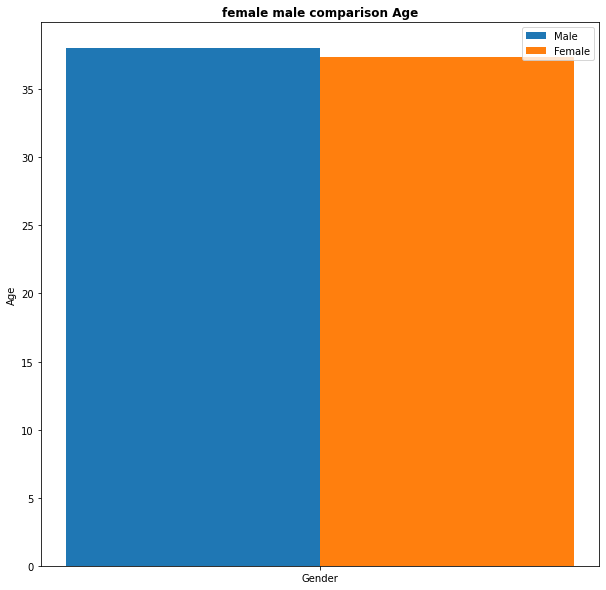

In [96]:
plt.figure(figsize=(10,10))
X=['Gender']

Male_data=df1['Age'][1]
Female_data=df1['Age'][2]

X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,Male_data,0.4,label="Male")
plt.bar(X_axis+0.2,Female_data,0.4,label="Female")

plt.xticks(X_axis,X)
plt.ylabel("Age")
plt.title("female male comparison Age",fontweight='bold')
plt.legend()
plt.show()

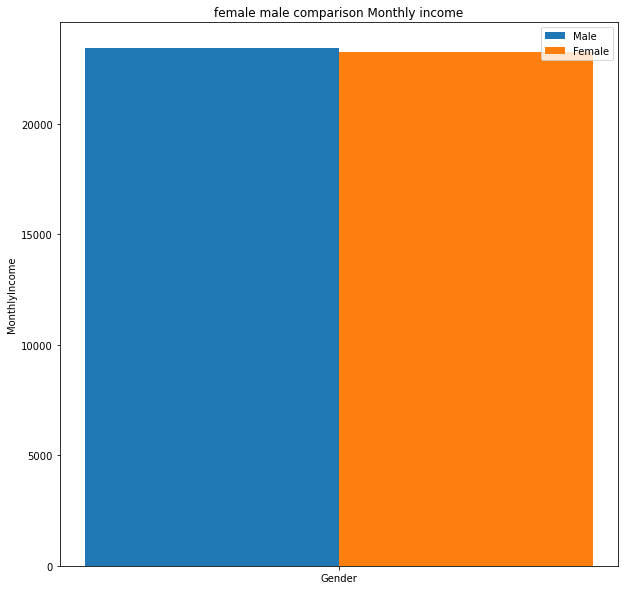

In [100]:
plt.figure(figsize=(10,10))
X=['Gender']

Male_data=df1['MonthlyIncome'][1]
Female_data=df1['MonthlyIncome'][2]

X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,Male_data,0.4,label="Male")
plt.bar(X_axis+0.2,Female_data,0.4,label="Female")

plt.xticks(X_axis,X)
plt.ylabel('MonthlyIncome')
plt.title("female male comparison Monthly income")
plt.legend()
plt.show()

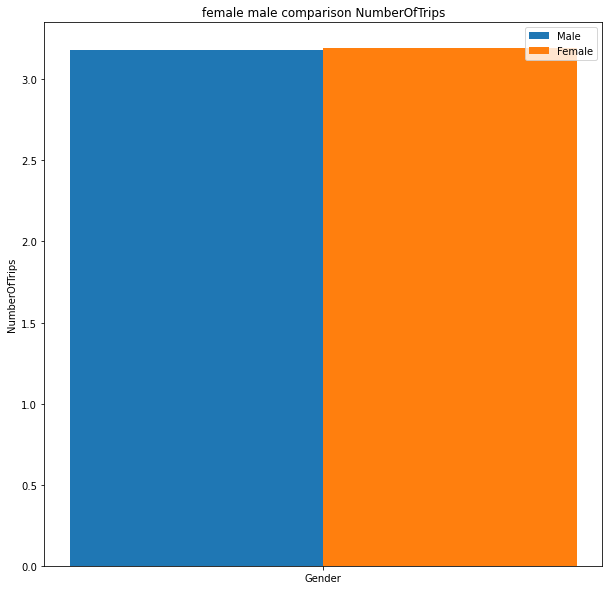

In [101]:
plt.figure(figsize=(10,10))
X=['Gender']

Male_data=df1['NumberOfTrips'][1]
Female_data=df1['NumberOfTrips'][2]

X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,Male_data,0.4,label="Male")
plt.bar(X_axis+0.2,Female_data,0.4,label="Female")

plt.xticks(X_axis,X)
plt.ylabel('NumberOfTrips')
plt.title("female male comparison NumberOfTrips")
plt.legend()
plt.show()

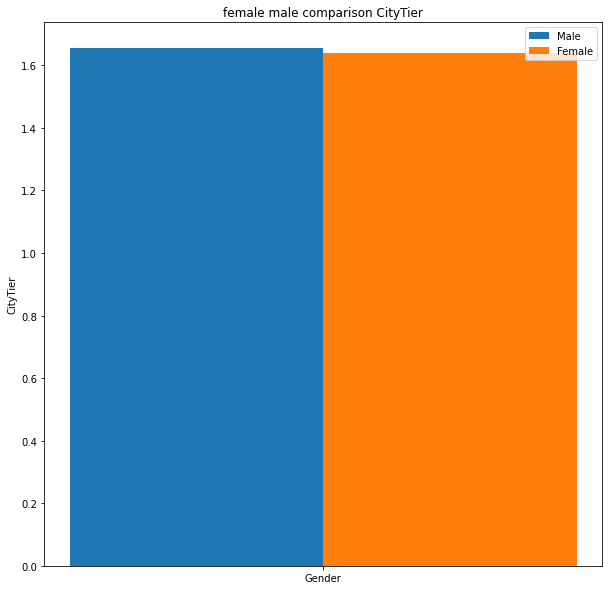

In [102]:
plt.figure(figsize=(10,10))
X=['Gender']

Male_data=df1['CityTier'][1]
Female_data=df1['CityTier'][2]

X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,Male_data,0.4,label="Male")
plt.bar(X_axis+0.2,Female_data,0.4,label="Female")

plt.xticks(X_axis,X)
plt.ylabel('CityTier')
plt.title("female male comparison CityTier")
plt.legend()
plt.show()

<AxesSubplot:>

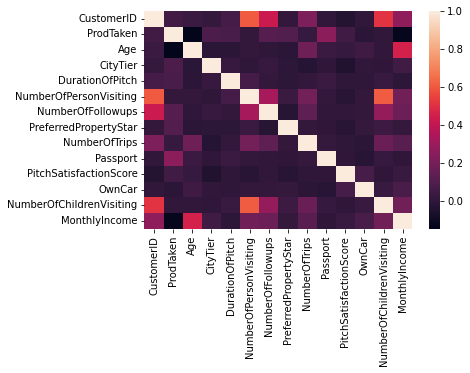

In [103]:
sns.heatmap(data_num.corr())

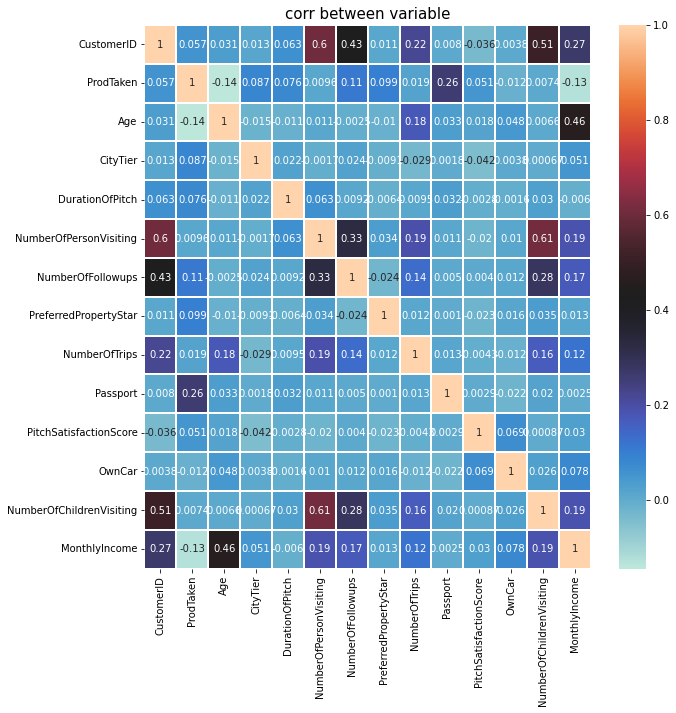

In [104]:
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

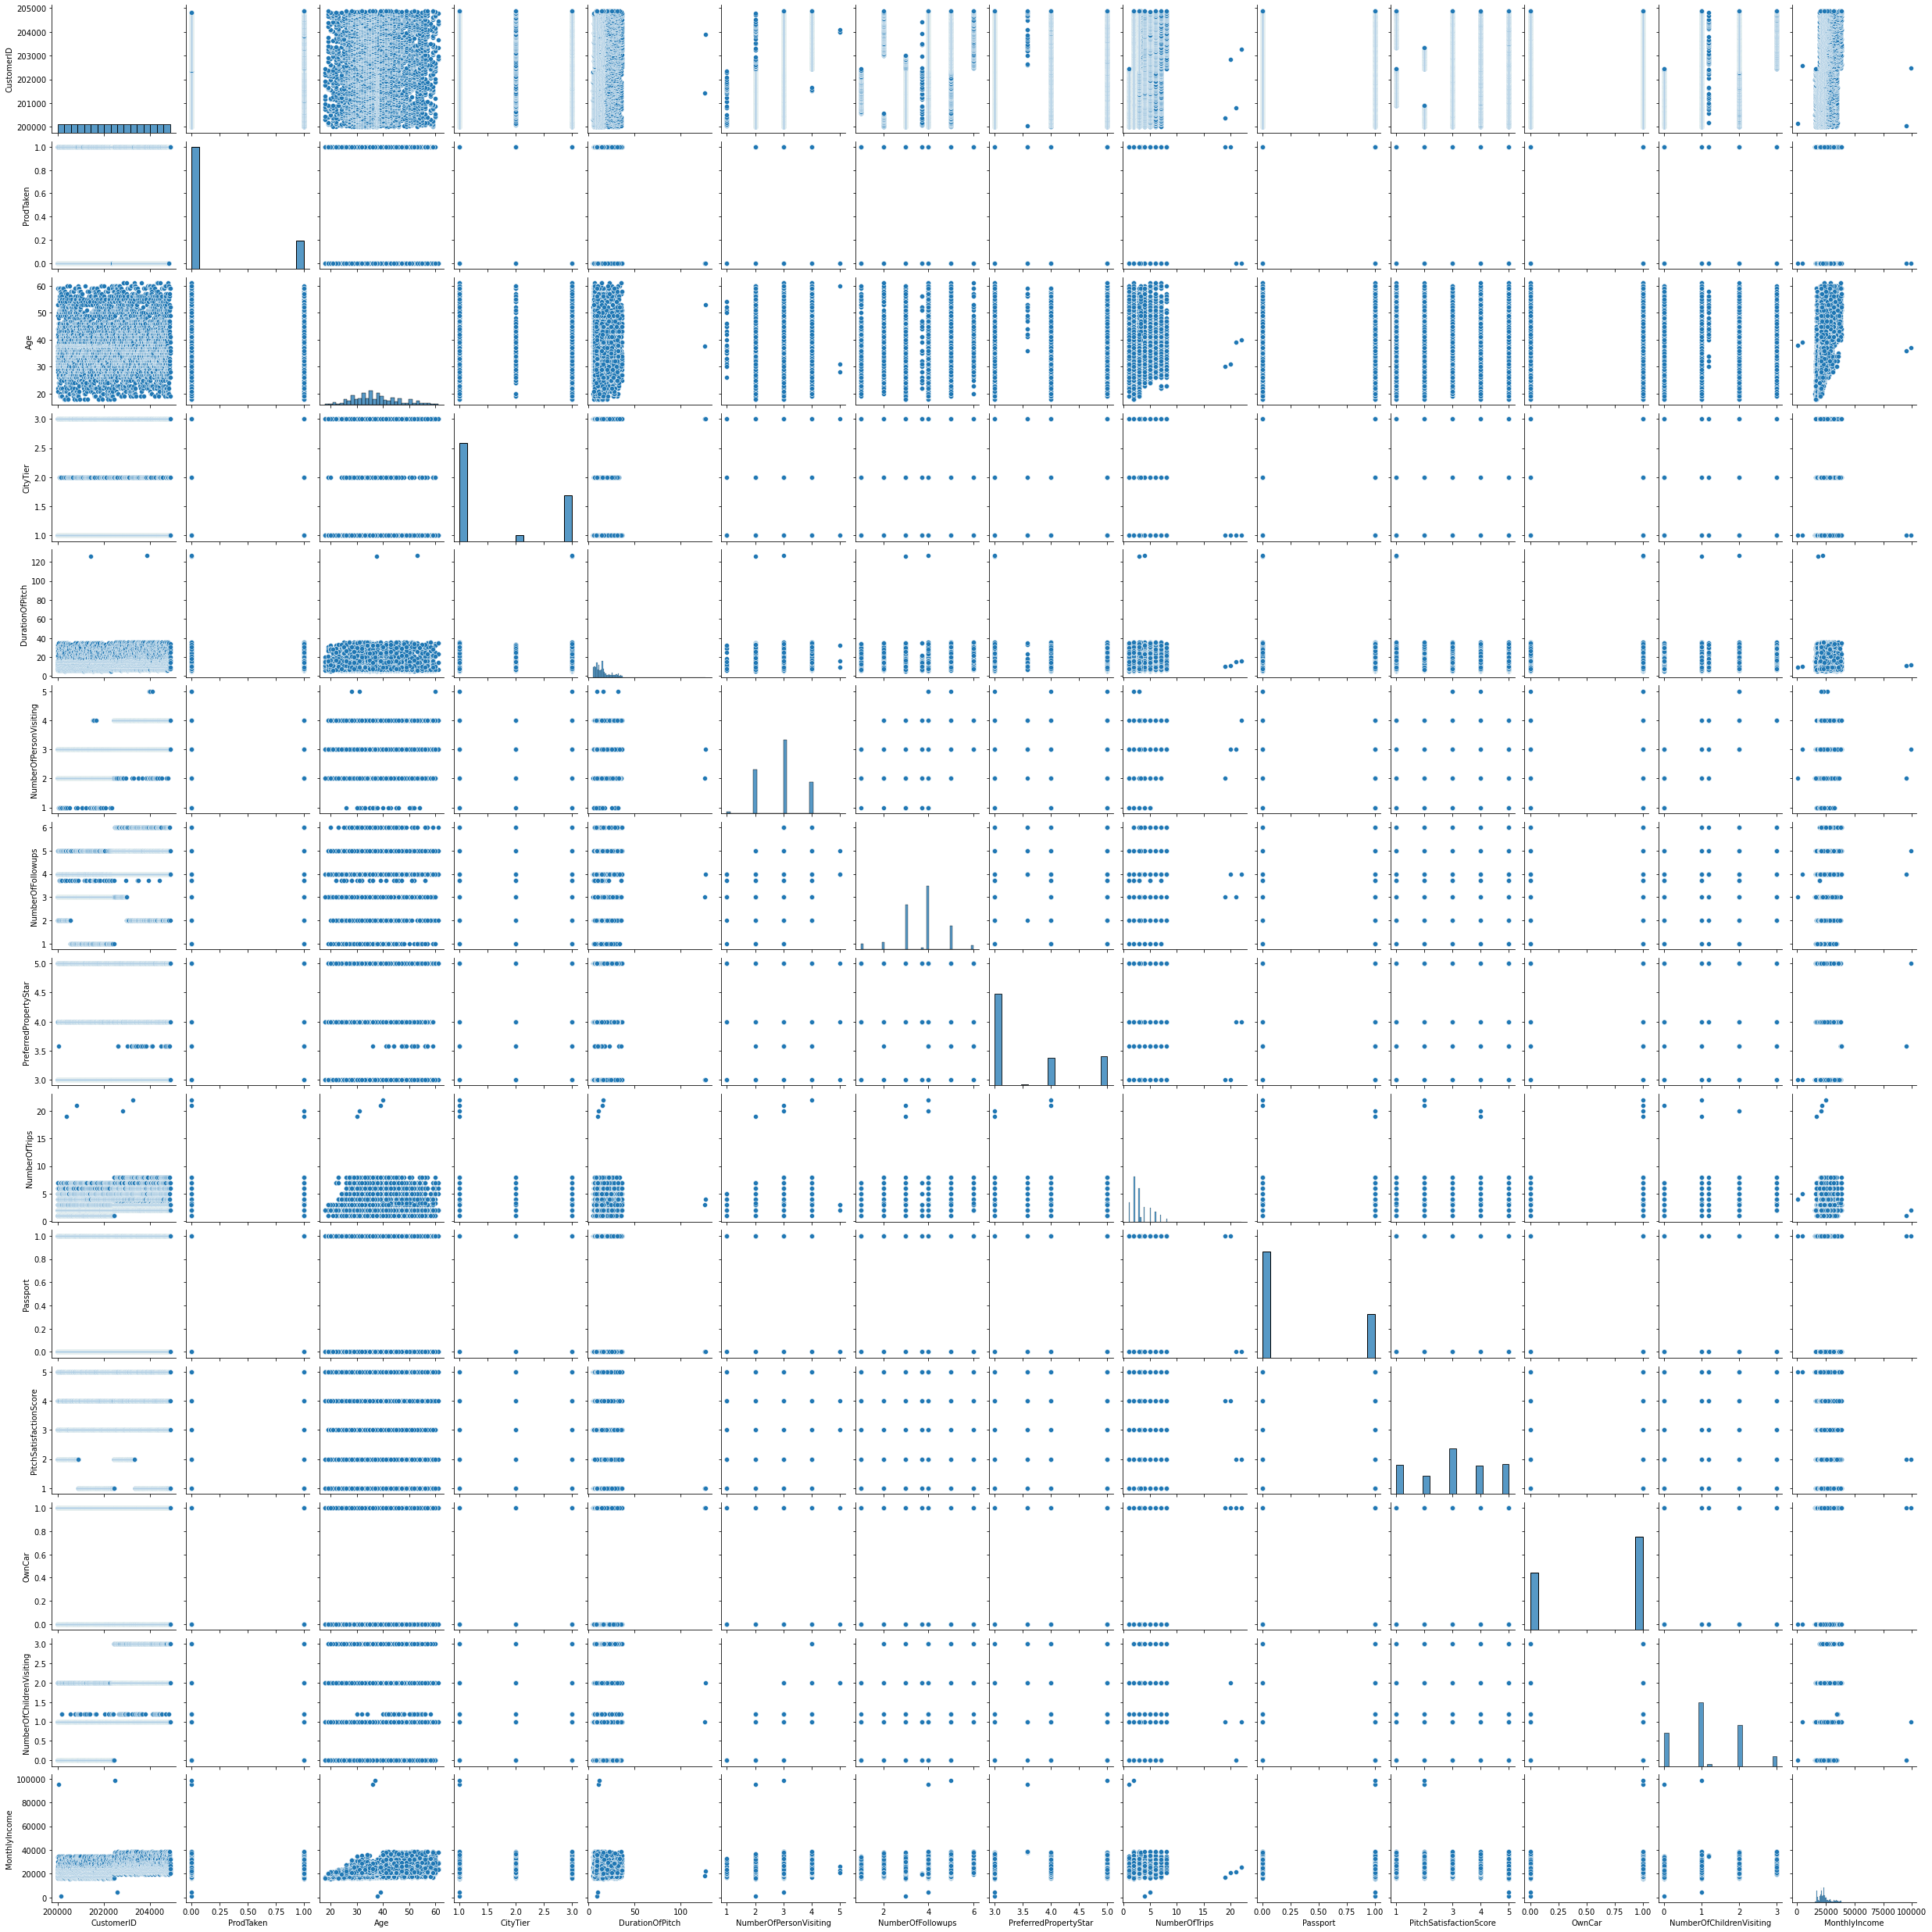

In [105]:
sns.pairplot(data_num)

<AxesSubplot:>

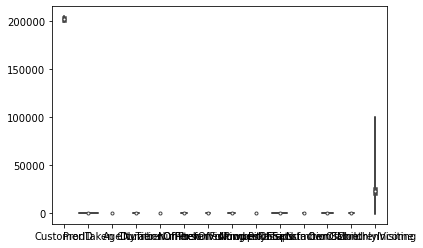

In [106]:
sns.violinplot(data=data_num)

In [107]:
# Factor plot  for the categorical variables

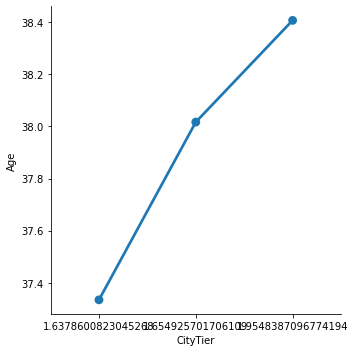

In [109]:
sns.factorplot(x ='CityTier', y ='Age', data = df1)

In [115]:
# Relplot

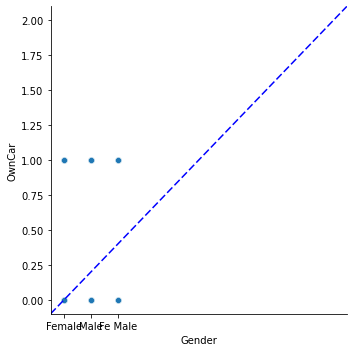

In [116]:
g = sns.relplot(data=data, x='Gender', y='OwnCar')
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

In [117]:
# Joint plot

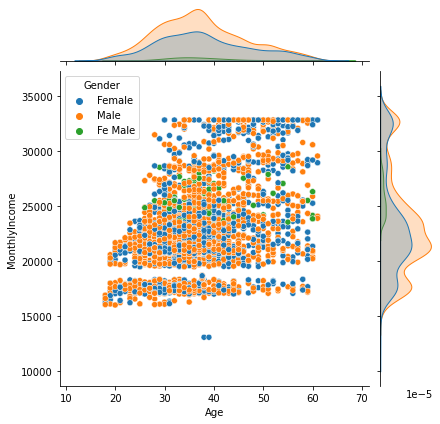

In [120]:
sns.jointplot(data=data, x="Age", y="MonthlyIncome", hue="Gender")